In [114]:
import keras.metrics
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# Importing the data

In [99]:
data = pd.read_csv('data.csv')

/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Deciding whether to keep or drop data
ID -> Drop
Client_Income -> Keep
Car_Owned -> Keep
Bike_Owned -> Keep
Active_Loan -> Keep
House_Own -> Keep
Child_Count -> Keep
Credit_Amount-> Keep
Loan_Annuity-> Keep
Accompany_Client-> Drop
Client_Income_Type-> Keep
Client_Education-> Keep
Client_Marital_Status-> Keep
Client_Gender-> Drop
Loan_Contract_Type-> Keep 
Client_Housing_Type -> Drop
Population_Region_Relative-> Keep
Age_Days-> Keep
Employed_Days -> Keep
Registration_Days -> Drop
ID_Days -> Drop
Own_House_Age -> Keep
Mobile_Tag -> Drop
Homephone_Tag -> Drop
Workphone_Working -> Drop
Client_Occupation -> Keep
Client_Family_Members -> Keep
Cleint_City_Rating -> Drop
Application_Process_Day -> Drop
Application_Process_Hour -> Drop
Client_Permanent_Match_Tag -> Drop
Client_Contact_Work_Tag -> Drop
Type_Organization -> Drop
Score_Source_1 -> Keep
Score_Source_2 -> Keep
Score_Source_3 -> Keep
Social_Circle_Default -> Drop
Phone_Change -> Drop
Credit_Bureau -> Drop
Default -> Target Class

In [100]:
drop_cols = ["ID", "Accompany_Client", "Client_Gender", "Client_Housing_Type", "Registration_Days", "ID_Days",
 "Mobile_Tag", "Homephone_Tag", "Workphone_Working", "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour",
 "Client_Permanent_Match_Tag", "Client_Contact_Work_Tag", "Type_Organization", "Social_Circle_Default", "Phone_Change","Credit_Bureau"]

data.drop(drop_cols, axis=1, inplace=True)

In [101]:
data

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Population_Region_Relative,Age_Days,Employed_Days,Own_House_Age,Client_Occupation,Client_Family_Members,Score_Source_1,Score_Source_2,Score_Source_3,Default
0,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,...,0.028663,13957,1062,NaN,Sales,2.0,0.568066,0.478787,NaN,0
1,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Service,Graduation,...,0.008575,14162,4129,0.0,NaN,2.0,0.563360,0.215068,NaN,0
2,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,Graduation dropout,...,0.0228,16790,5102,NaN,Realty agents,2.0,NaN,0.552795,0.329655,0
3,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Retired,Secondary,...,0.010556,23195,365243,NaN,NaN,2.0,NaN,0.135182,0.631355,0
4,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Commercial,Secondary,...,0.020713,11366,2977,6.0,Laborers,4.0,0.508199,0.301182,0.355639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Service,Secondary,...,0.031329,12889,2863,NaN,Laborers,2.0,NaN,0.173527,0.184116,1
121852,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Commercial,Graduation,...,0.018209,8648,636,NaN,Sales,2.0,NaN,0.371559,0.406617,0
121853,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Govt Job,Secondary,...,0.008068,9152,1623,NaN,High skill tech,3.0,0.169049,0.048079,NaN,0
121854,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Service,Graduation,...,0.028663,10290,847,4.0,Sales,2.0,0.182737,0.103538,0.0774985,0


### How much of each of the remaining columns is missing?

In [102]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{}: {}%'.format(col, round(pct_missing*100)))

Client_Income: 3%
Car_Owned: 3%
Bike_Owned: 3%
Active_Loan: 3%
House_Own: 3%
Child_Count: 3%
Credit_Amount: 3%
Loan_Annuity: 4%
Client_Income_Type: 3%
Client_Education: 3%
Client_Marital_Status: 3%
Loan_Contract_Type: 3%
Population_Region_Relative: 4%
Age_Days: 3%
Employed_Days: 3%
Own_House_Age: 66%
Client_Occupation: 34%
Client_Family_Members: 2%
Score_Source_1: 56%
Score_Source_2: 5%
Score_Source_3: 22%
Default: 0%


Some of these columns have a lot of data missing. And simply taking out the missing rows from these columns will drastically reduce the size of our dataset. For this reason we are choosing to remove the features with more than 10% missing data.

In [103]:
drop_cols = ["Own_House_Age", "Client_Occupation", "Score_Source_1", "Score_Source_3"]
data.drop(drop_cols, axis=1, inplace=True)
data.dropna(inplace=True)
data

## Describing the Dataset:

Clinet_Income: Client Income in $, Integer

Car_Owned: Does client own another car?, Categorical 1 for Yes 0 for No

Bike_Owned: Does client own a Bike?, Categorical 1 for Yes 0 for No

Active_Loan: Does client have another active loan?, Categorical 1 for Yes 0 for No

House_Own: Does client own a house?, Categorical 1 for Yes 0 for No

Child_Count: How many children does the client own?, Integer

Credit_Amount: Credit amount of the loan in $, Integer

Loan_Annuity: Loan annuity in $, Integer

Client_Income_Type: Type of income of the client, Categorical

Client_Education: Education level of the client, Categorical

Client_Marital_Status: Marital status of the client, Categorical

Loan_Contract_Type: Type of loan contract, Categorical

Population_Region_Relative: Normalized population of region where client lives (higher number means the client lives in more populated region), Float

Age_Days: Age of the client in days, Integer

Employed_Days: How many days has the client been employed? Integer

Clinet_Family_Members: How many family members does the client have? Integer

Score_Source_2: Normalized score from external data source, Float

Default: Did the client default on the loan?, Categorical 1 for Yes 0 for No

In [106]:
columns = ["Employed_Days", "Age_Days", "Client_Income", "Credit_Amount", "Loan_Annuity", "Population_Region_Relative"]

# Drop all rows where the column has non-numeric values:
print(len(data))
for col in columns:
    data = data[data[col] != 'x']
    data = data[data[col] != '$']
    data = data[data[col] != '@']
    data = data[data[col] != '#']
    data = data[data[col] != '#VALUE!']
print(len(data))

# Setting datatype of these columns to float64:
for col in columns:
    data[col] = data[col].astype('float64')

70918
70882


In [121]:
data.dtypes

Client_Income                 float64
Car_Owned                      object
Bike_Owned                     object
Active_Loan                    object
House_Own                      object
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Loan_Contract_Type             object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Client_Family_Members         float64
Score_Source_2                float64
Default                         int64
dtype: object

In [122]:
categorical_headers = ["Client_Income_Type", "Client_Education", "Client_Marital_Status", "Loan_Contract_Type", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own"]
numerical_headers = ["Client_Income","Child_Count", "Credit_Amount","Loan_Annuity","Population_Region_Relative","Age_Days","Employed_Days","Client_Family_Members", "Score_Source_2"]

In [123]:
# Convert all categorical headers to strings:
for col in categorical_headers:
    data[col] = data[col].astype('str')

In [124]:
data.dtypes

Client_Income                 float64
Car_Owned                      object
Bike_Owned                     object
Active_Loan                    object
House_Own                      object
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Loan_Contract_Type             object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Client_Family_Members         float64
Score_Source_2                float64
Default                         int64
dtype: object

## Model Performance Algorithm:

idk vedant pls write this

## Splitting the data:

Idk write later

In [125]:
def CrossValidation(model, X, y, cv=10, epochs=10, batch_size=32, verbose=0):
    # Randomize the feature data and target data:
    X, y = shuffle(X, y, random_state=0)
    # Create a list to store the scores:
    scores = []
    # Split the data into cv folds:
    for train_index, test_index in KFold(n_splits=cv, random_state=0).split(X):
        # Split the data into training and test sets:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model:
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
        # Evaluate the model:
        scores.append(model.score(X_test, y_test))
    return scores

In [126]:
target = data["Default"]
features = data.drop(columns=['Default'])

In [127]:
# Columns to be crossed
cross_columns = [
                 ['Client_Income_Type','Client_Education','Client_Marital_Status','Loan_Contract_Type'],
                 ['Client_Income_Type','Loan_Contract_Type', 'Active_Loan'],
                 ['Client_Income_Type','Loan_Contract_Type'],
                 ['Active_Loan','Loan_Contract_Type', 'Bike_Owned']
]

encoders = {

}

cross_col_df_names = []
for cols_list in cross_columns:

    enc = LabelEncoder()

    # 1. create crossed labels by join operation
    features_crossed = features[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((features_crossed.to_numpy())))
    
    # 3. Save into dataframe with new name
    features[cross_col_name] = enc.transform(features_crossed)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 

# Label encode all of the categrorical headers:
for col in categorical_headers:
    encoders[col] = LabelEncoder()
    features[col] = encoders[col].fit_transform(features[col])

# Modeling

In [53]:
# split the feature dataframe into categorical_features and numerical_features:
categorical_features = features[categorical_headers]
crossed_features = features[cross_col_df_names]
numerical_features = features[numerical_headers]

In [62]:
X_crossed = crossed_features.to_numpy()
X_cat = categorical_features.to_numpy()
X_num = numerical_features.to_numpy()
# Keras input:
from tensorflow.keras.layers import Input, Dense, concatenate, Embedding
from tensorflow.keras.models import Model
input_crossed = Input(shape=(crossed_features.shape[1],), 
                     dtype='int64', 
                     name='wide_inputs')

crossed_outputs = []
for idx,col in enumerate(cross_col_df_names):

    N = len(encoders[col].classes_)

    N_reduced = int(np.sqrt(N))

    x = tf.gather(input_crossed, idx, axis=1)

    x = Embedding(input_dim=N, output_dim=N_reduced,
     input_length=1, name=col+"_embed")(x)

    crossed_outputs.append(x)
wide_branch = concatenate(crossed_outputs, name='wide_concat')
all_deep_branch_outputs = []
# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers):

    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = features[col].max()+1
    N_reduced = int(np.sqrt(N))

    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=N_reduced,
                  input_length=1, name=col+'_embed')(x)

    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)

# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_num.shape[1],), name='numeric')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)

all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num],outputs=final_branch)



#model = Model(inputs=input_crossed, outputs=wide_branch)

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#history = model.fit(crossed_features, target, epochs=10, batch_size=32, verbose=1)




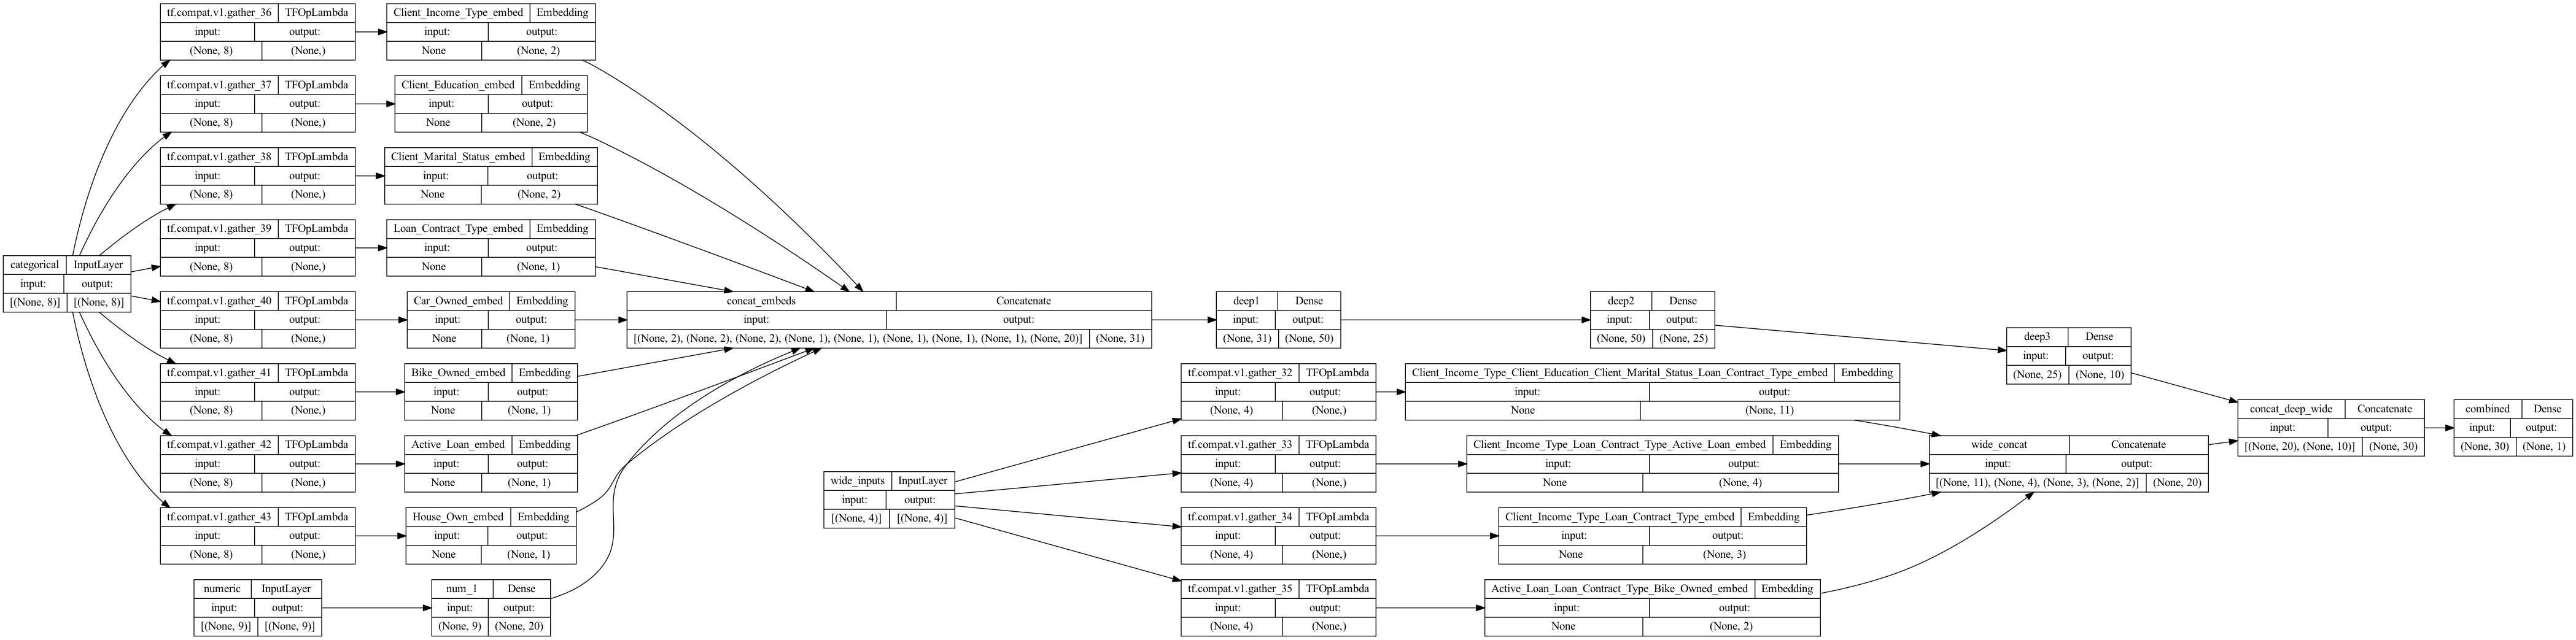

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [74]:
%%time
class_weight = {0: 1.,
                1: 1000}

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy', keras.metrics.Recall()])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_crossed,X_cat,X_num],
                    target,
                    class_weight=class_weight,
                    epochs=15,
                    batch_size=32,
                    verbose=1)

Epoch 1/15


2022-11-16 23:08:41.438302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2216/2216 [==============================] - 44s 19ms/step - loss: 80.5282 - accuracy: 0.9195 - recall_3: 0.0000e+00
Epoch 2/15
2216/2216 [==============================] - 42s 19ms/step - loss: 80.5282 - accuracy: 0.9195 - recall_3: 0.0000e+00
Epoch 3/15
 529/2216 [======>.......................] - ETA: 31s - loss: 81.2264 - accuracy: 0.9188 - recall_3: 0.0000e+00

KeyboardInterrupt: 